In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings('ignore')

### from A1

#### Data Loading

In [2]:
# loading the data
df= pd.read_csv('./data/Cars.csv')

In [3]:
# checking the data in the dataset
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
# summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


#### Data Cleaning and Processing
Preparing dataset

In [5]:
# For the Feature of Owner
# checking unique values for the owner column
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [6]:
owner_mapping = {'First Owner': 1, 'Second Owner': 2, 'Third Owner': 3, 'Fourth & Above Owner': 4, 'Test Drive Car': 5}
df['owner'] = df['owner'].map(owner_mapping)# For the feature owner: mapping 'owner' column to appropriate values
df['owner'].unique() # Checking the mapping again 

array([1, 2, 3, 4, 5])

In [7]:
# For the feature Fuel
# checking unique values for the fuel column
df['fuel'].unique()

array(['Diesel', 'Petrol', 'LPG', 'CNG'], dtype=object)

In [8]:
# remove all rows with CNG and LPG because CNG and LPG use a different mileage system i.e., km/kg which is different from kmpl for Diesel and Petrol
df.drop(df[df['fuel'].isin(['LPG', 'CNG'])].index, inplace=True)

df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [9]:
#For the feature Mileage
# remove “kmpl” and convert the column to numerical type (e.g., float)
df['mileage'] = df['mileage'].str.split().str[0].astype(float) 

df['mileage'].head() # checking 

0    23.40
1    21.14
2    17.70
3    23.00
4    16.10
Name: mileage, dtype: float64

In [10]:
# removing "CC" from engine column
df['engine'] = df['engine'].str.replace('CC', '')
df['engine'].head()

0    1248 
1    1498 
2    1497 
3    1396 
4    1298 
Name: engine, dtype: object

In [11]:
# changing the data type of engine column to float
df['engine'] = df['engine'].astype(float)
df['engine'].head()

0    1248.0
1    1498.0
2    1497.0
3    1396.0
4    1298.0
Name: engine, dtype: float64

In [12]:
# For the feature Max Power
df['max_power'] = df['max_power'].str.split().str[0].astype(float)
df['max_power'].head() # chekcing

0     74.00
1    103.52
2     78.00
3     90.00
4     88.20
Name: max_power, dtype: float64

In [13]:
df['name'] = df['name'].str.split().str[0]

df['name'].head()

0     Maruti
1      Skoda
2      Honda
3    Hyundai
4     Maruti
Name: name, dtype: object

In [14]:
# dropping the 'torque' column
df.drop('torque', axis = 1, inplace = True)

In [15]:
df.drop(df[df['owner'] == 5].index, inplace = True)

#### Explanatory Data Analysis (EDA)

In [16]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


##### Distribution Plot

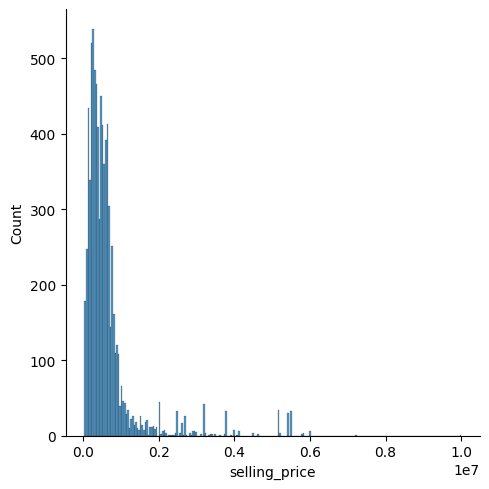

In [17]:
# checking the distribution of selling_price
# selling price is found to be right skewed
sns.displot(df['selling_price'])
plt.show()

##### Scatter Plot

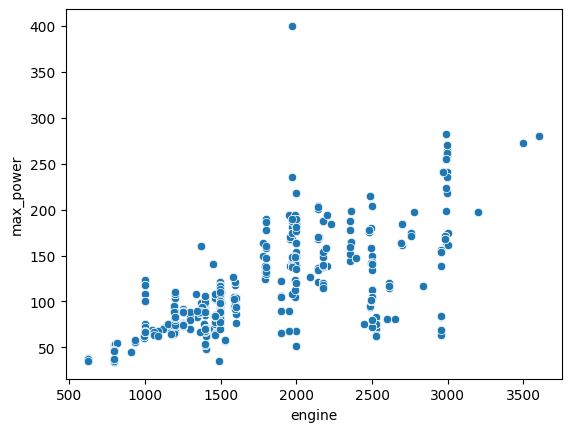

In [18]:
# showing a positive correlation between engine and max_power
sns.scatterplot(x='engine', y='max_power', data=df)
plt.show()

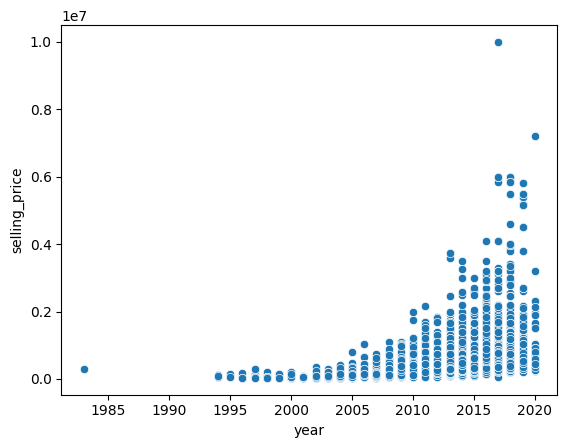

In [19]:
# year vs selling_price
# the selling price of the cars increases as the year increases
sns.scatterplot(x='year', y='selling_price', data=df)
plt.show()

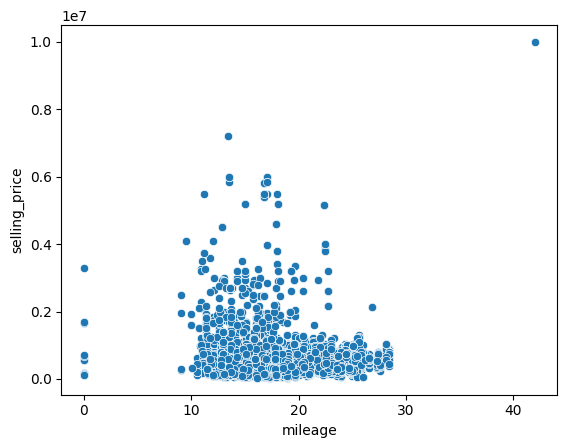

In [20]:
# mileage vs selling_price
# a lot of cars in the dataset have moderate to low mileage
sns.scatterplot(x='mileage', y='selling_price', data=df)
plt.show()

##### One hot encoding method

In [21]:
# checking unique values for the seller type
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [22]:
df = pd.get_dummies(df, columns=['seller_type'])
df.head()

# seller_type has 3 values and if we do label encoding we will create a unintentional order hence choose one hot encoding

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,Maruti,2014,450000,145500,Diesel,Manual,1,23.40,1248.0,74.00,5.0,False,True,False
1,Skoda,2014,370000,120000,Diesel,Manual,2,21.14,1498.0,103.52,5.0,False,True,False
2,Honda,2006,158000,140000,Petrol,Manual,3,17.70,1497.0,78.00,5.0,False,True,False
3,Hyundai,2010,225000,127000,Diesel,Manual,1,23.00,1396.0,90.00,5.0,False,True,False
4,Maruti,2007,130000,120000,Petrol,Manual,1,16.10,1298.0,88.20,5.0,False,True,False


##### Label Encoding

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [24]:
df['fuel'].unique()

array(['Diesel', 'Petrol'], dtype=object)

In [25]:
# label encoding the fuel column
df['fuel'] = le.fit_transform(df['fuel'])

In [26]:
# Check the mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Diesel': np.int64(0), 'Petrol': np.int64(1)}


In [27]:
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [28]:
# label encoding the transmission column
df['transmission'] = le.fit_transform(df['transmission'])

In [29]:
# Check the mapping
print(dict(zip(le.classes_, le.transform(le.classes_))))

{'Automatic': np.int64(0), 'Manual': np.int64(1)}


In [30]:
df.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer
0,Maruti,2014,450000,145500,0,1,1,23.40,1248.0,74.00,5.0,False,True,False
1,Skoda,2014,370000,120000,0,1,2,21.14,1498.0,103.52,5.0,False,True,False
2,Honda,2006,158000,140000,1,1,3,17.70,1497.0,78.00,5.0,False,True,False
3,Hyundai,2010,225000,127000,0,1,1,23.00,1396.0,90.00,5.0,False,True,False
4,Maruti,2007,130000,120000,1,1,1,16.10,1298.0,88.20,5.0,False,True,False


<Axes: >

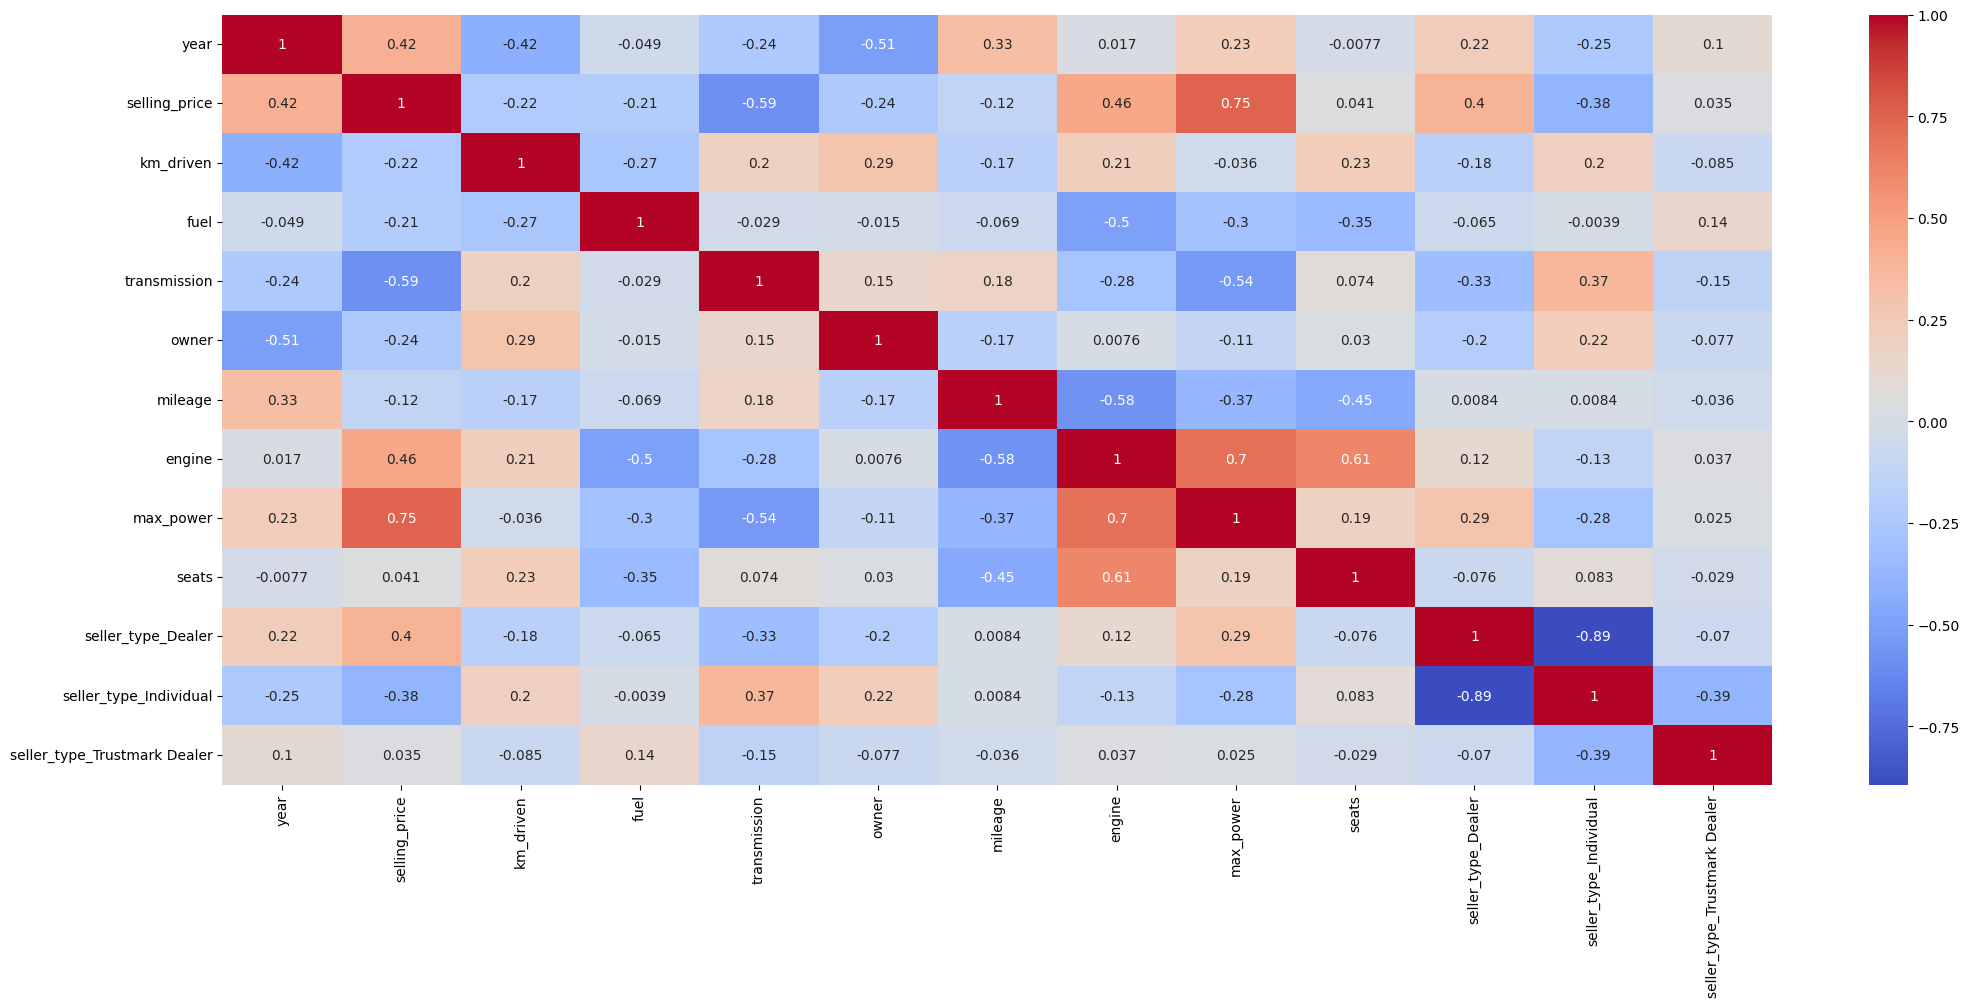

In [31]:
df_without_name = df.drop(columns=['name'])
plt.figure(figsize=(25, 10))
sns.heatmap(df_without_name.corr(), annot=True, cmap='coolwarm')

#### Feature Selection

A3

In [32]:
bins = [0, 260000, 450000, 680000, float('inf')]
labels = [0, 1, 2, 3]
df['price_category'] = pd.cut(df['selling_price'], bins=bins, labels=labels)

In [33]:
# dropping the selling price from the dataset
df.drop(columns=['selling_price'], inplace= True)

In [34]:
df['price_category'].unique()

[1, 0, 2, 3]
Categories (4, int64): [0 < 1 < 2 < 3]

In [35]:
df

,name,year,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,price_category
0,Maruti,2014,145500,0,1,1,23.40,1248.0,74.00,5.0,False,True,False,1
1,Skoda,2014,120000,0,1,2,21.14,1498.0,103.52,5.0,False,True,False,1
2,Honda,2006,140000,1,1,3,17.70,1497.0,78.00,5.0,False,True,False,0
3,Hyundai,2010,127000,0,1,1,23.00,1396.0,90.00,5.0,False,True,False,0
4,Maruti,2007,120000,1,1,1,16.10,1298.0,88.20,5.0,False,True,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,2013,110000,1,1,1,18.50,1197.0,82.85,5.0,False,True,False,1
8124,Hyundai,2007,119000,0,1,4,16.80,1493.0,110.00,5.0,False,True,False,0
8125,Maruti,2009,120000,0,1,1,19.30,1248.0,73.90,5.0,False,True,False,1
8126,Tata,2013,25000,0,1,1,23.57,1396.0,70.00,5.0,False,True,False,1


In [36]:
#Choosing strong features
X = df[['year','mileage','max_power']]
assert len(X.shape) == 2 # assert used to insure that the shape of X is 2

In [37]:
y = df['price_category']

assert len(y.shape) == 1

##### Splitting the data into traiming and testing 

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### Preprocessing

##### Null values

In [39]:
# checking for missing values
X_train[['year','mileage','max_power']].isna().sum()

year           0
mileage      154
max_power    149
dtype: int64

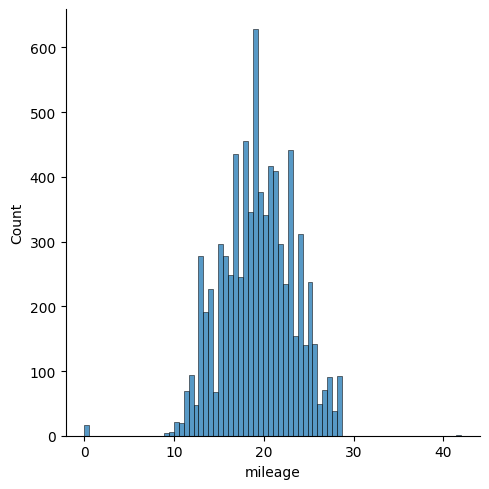

In [40]:
sns.displot(data=df, x='mileage')

# plot generated to check whether it is skewed or normalized to choose between mean and median for filling the null values

In [41]:
df['mileage'].describe()

count    7814.000000
mean       19.391962
std         4.001972
min         0.000000
25%        16.780000
50%        19.300000
75%        22.320000
max        42.000000
Name: mileage, dtype: float64

In [42]:
#let's fill the training set for mileage
X_train['mileage'].fillna(X_train['mileage'].median(), inplace=True) # the data is not normally distributed i.e, the data is skewed hence median used otherwise use mean

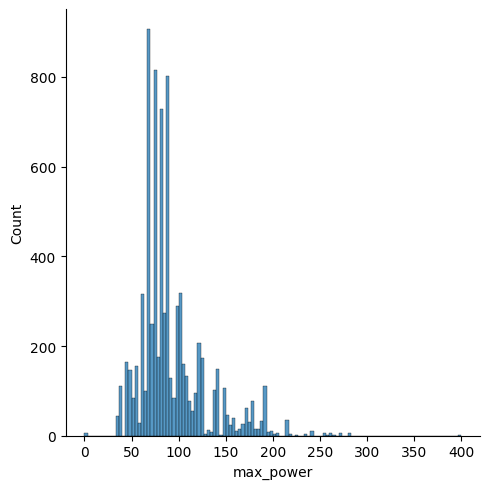

In [43]:
sns.displot(data=df, x='max_power')

# plot generated to check whether it is skewed or normalized to choose between mean and median for filling the null values

In [44]:
df['max_power'].describe()

count    7820.000000
mean       91.819726
std        35.804513
min         0.000000
25%        68.850000
50%        82.400000
75%       102.000000
max       400.000000
Name: max_power, dtype: float64

In [45]:
#filling missing value
X_train['max_power'].fillna(X_train['max_power'].mean(), inplace=True) # the data is not normally distributed i.e, the data is skewed hence median used otherwise use mean

In [46]:
X_train[['year','mileage','max_power']].isna().sum()

year         0
mileage      0
max_power    0
dtype: int64

In [47]:
X_test[['year','mileage','max_power']].isna().sum()

year          0
mileage      60
max_power    59
dtype: int64

In [48]:
#filing missing values
X_test['mileage'].fillna(X_train['mileage'].median(), inplace=True) # the data is not normally distributed i.e, the data is skewed hence median used otherwise use mean
X_test['max_power'].fillna(X_train['max_power'].mean(), inplace=True) # the data is not normally distributed i.e, the data is skewed hence median used otherwise use mean

In [49]:
X_test[['year', 'mileage', 'max_power']].isna().sum()

year         0
mileage      0
max_power    0
dtype: int64

In [50]:
y_train.isna().sum()

np.int64(0)

In [51]:
y_test.isna().sum()

np.int64(0)

In [52]:
# checking number of rows
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5619, 3), (5619,), (2409, 3), (2409,))

##### Checking for Outliers

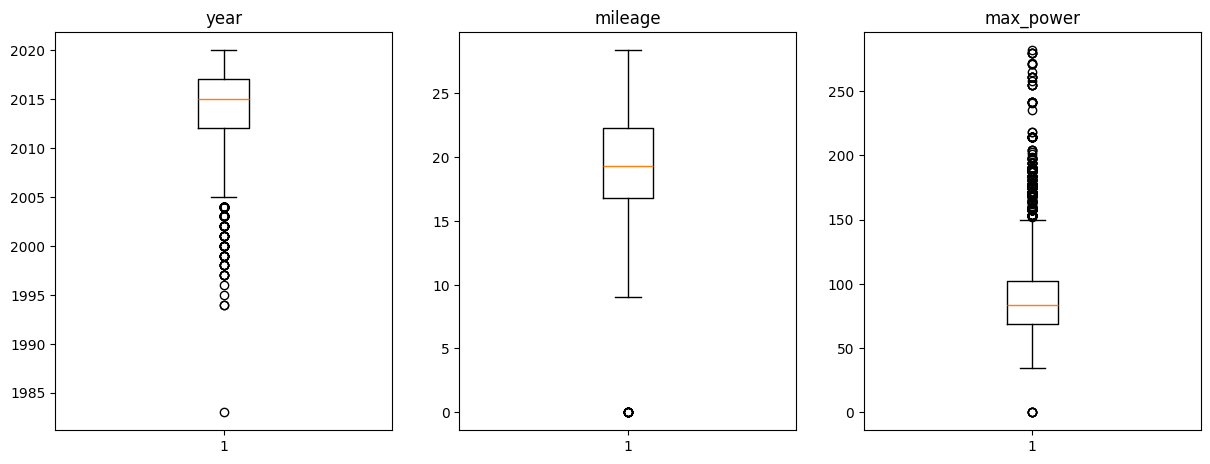

In [53]:
col_dict = {'year':1,'mileage':2, 'max_power':3}

# checking outliers
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [54]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q25, q75 = np.percentile(data[col], [25, 75])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_indices = np.where((data[col] < min_val) | (data[col] > max_val))[0]
    outlier_count = len(outlier_indices)
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [55]:
for col in X_train.columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 145
Percent of data that is outlier: 2.58%

---------------mileage---------------

Number of outliers: 14
Percent of data that is outlier: 0.25%

---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%


In [56]:
from sklearn.preprocessing import MinMaxScaler
#The MinMaxScaler in sklearn.preprocessing scales numerical features to a fixed range, typically between 0 and 1.
#tried MinMaxScaler for A2

no_of_cols = ['year', 'mileage', 'max_power']


scaler = MinMaxScaler(feature_range=(0, 1))

X_train[no_of_cols] = scaler.fit_transform(X_train[no_of_cols])
X_test[no_of_cols] = scaler.transform(X_test[no_of_cols])

In [57]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 3)
Shape of y_train:  (5619,)
Shape of X_test:  (2409, 3)
Shape of y_test:  (2409,)


In [58]:
#for web app scaled model
import joblib
joblib.dump(scaler, "../code/model/scaler.dump")

['../code/model/scaler.dump']

### A3 car price prediction

In [59]:
k = len(set(y))  # no. of class  (can also use np.unique)
m = X_train.shape[0]  # no.of samples
n = X_train.shape[1]  # no. of features
Y_train_encoded = np.zeros((m, k))
for each_class in range(k):
    cond = y_train==each_class
    Y_train_encoded[np.where(cond), each_class] = 1

In [60]:
#experiment tracking
import mlflow
import os
print(mlflow.__version__)
# This the dockerized method.
# We build two docker containers, one for python/jupyter and another for mlflow.
# The url `mlflow` is resolved into another container within the same composer.
mlflow.set_tracking_uri("https://mlflow.ml.brain.cs.ait.ac.th")
os.environ["MLFLOW_TRACKING_USERNAME"] = "admin"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "password"
# Ensure the experiment exists before setting it
# experiment_name = "st125041-PratibhaHamal"
os.environ["LOGNAME"] = "st125041-A3"
mlflow.set_experiment("st125041-A3")

2.21.3


<Experiment: artifact_location='mlflow-artifacts:/951198864231561543', creation_time=1743432627661, experiment_id='951198864231561543', last_update_time=1743432627661, lifecycle_stage='active', name='st125041-A3', tags={}>

In [61]:
import time
import numpy as np
import matplotlib.pyplot as plt

class LogisticRegression:
    
    def __init__(self, regularization, k, n, method, alpha=0.001, max_iter=5000):
        self.regularization = regularization
        self.k = k
        self.n = n
        self.alpha = alpha
        self.max_iter = max_iter
        self.method = method
    
    def fit(self, X, Y):
        self.W = np.random.rand(self.n, self.k)
        self.losses = []

        params = {
            "reg": type(self).__name__,
            "method": self.method,
            "k": self.k,
            "n": self.n,
            "alpha": self.alpha,
            "max_iter": self.max_iter
        }
        mlflow.log_params(params=params)
    
        if self.method == "batch":
            start_time = time.time()
            for i in range(self.max_iter):
                loss, grad =  self.gradient(X, Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "minibatch":
            start_time = time.time()
            batch_size = int(0.3 * X.shape[0])
            for i in range(self.max_iter):
                ix = np.random.randint(0, X.shape[0]) #<----with replacement
                batch_X = X[ix:ix+batch_size]
                batch_Y = Y[ix:ix+batch_size]
                loss, grad = self.gradient(batch_X, batch_Y)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
            
        elif self.method == "sto":
            start_time = time.time()
            list_of_used_ix = []
            for i in range(self.max_iter):
                idx = np.random.randint(X.shape[0])
                while i in list_of_used_ix:
                    idx = np.random.randint(X.shape[0])
                X_train = X.iloc[idx, :].to_numpy().reshape(1, -1)
                Y_train = Y[idx]
                loss, grad = self.gradient(X_train, Y_train)
                self.losses.append(loss)
                self.W = self.W - self.alpha * grad
                
                list_of_used_ix.append(i)
                if len(list_of_used_ix) == X.shape[0]:
                    list_of_used_ix = []
                if i % 500 == 0:
                    print(f"Loss at iteration {i}", loss)
                    mlflow.log_metric(key="train_loss", value=loss, step=i)
            print(f"time taken: {time.time() - start_time}")
        
        else:
            raise ValueError('Method must be one of the followings: "batch", "minibatch" or "sto".')
        
    def gradient(self, X, Y):
        m = X.shape[0]
        h = self.h_theta(X, self.W)
        loss = - np.sum(Y*np.log(h)) / m
        error = h - Y

        if self.regularization:
            grad = self.softmax_grad(X, error) + self.regularization.derivation(self.W)
        else:
            grad = self.softmax_grad(X, error)

        return loss, grad

    def softmax(self, theta_t_x):
        theta_t_x = np.array(theta_t_x) 
        return np.exp(theta_t_x) / np.sum(np.exp(theta_t_x), axis=1, keepdims=True)


    def softmax_grad(self, X, error):
        return  X.T @ error

    def h_theta(self, X, W):
        '''
        Input:
            X shape: (m, n)
            w shape: (n, k)
        Returns:
            yhat shape: (m, k)
        '''
        return self.softmax(X @ W)
    
    def predict(self, X_test):
        return np.argmax(self.h_theta(X_test, self.W), axis=1)
    
    def plot(self):
        plt.plot(np.arange(len(self.losses)) , self.losses, label = "Train Losses")
        plt.title("Losses")
        plt.xlabel("epoch")
        plt.ylabel("losses")
        plt.legend()

    def accuracy(self, y_test, y_pred):
        return np.count_nonzero(y_test==y_pred) / len(y_test)

    def precision(self, y_test, y_pred, c=0):
        tp = np.nansum(np.logical_and(y_test == c, y_pred == c))
        fp = np.nansum(np.logical_and(y_test != c, y_pred == c))

        if tp + fp == 0:
            return 0
        else:
            return tp / (tp + fp)
    
    def recall(self, y_test, y_pred, c=0):
        tp = np.nansum(np.logical_and(y_test == c, y_pred == c))
        fn = np.nansum(np.logical_and(y_test == c, y_pred != c))
        
        if tp + fn == 0:
            return 0
        else:
            return tp / (tp + fn)
    
    def f1_score(self, y_test, y_pred, c=0):
        precision = self.precision(y_test, y_pred, c)
        recall = self.recall(y_test, y_pred, c)

        if precision + recall == 0:
            return 0
        else:
            return 2 * precision * recall / (precision + recall)
    
    def macro_precision(self, y_test, y_pred):
        precisions = [self.precision(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(precisions) / self.k
    
    def macro_recall(self, y_test, y_pred):
        recalls = [self.recall(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(recalls) / self.k
    
    def macro_f1(self, y_test, y_pred):
        f1s = [self.f1_score(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(f1s) / self.k
    
    def weighted_precision(self, y_test, y_pred):
        precisions = [np.count_nonzero(y_test == c)  / len(y_test) * self.precision(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(precisions)
    
    def weighted_recall(self, y_test, y_pred):
        recalls = [np.count_nonzero(y_test == c)  / len(y_test) * self.recall(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(recalls)
    
    def weighted_f1(self, y_test, y_pred):
        f1s = [np.count_nonzero(y_test == c)  / len(y_test) * self.f1_score(y_test, y_pred, c) for c in range(self.k)]
        return np.sum(f1s)
    
    def classification_report(self, y_test, y_pred):
        cols = ["precision", "recall", "f1-score"]
        idx = list(range(self.k))+["accuracy", "macro", "weighted"]

        report = [[self.precision(y_test, y_pred, c),
                self.recall(y_test, y_pred, c),
                self.f1_score(y_test, y_pred, c)] for c in range(self.k)]

        report.append(["", "", self.accuracy(y_test, y_pred)])

        report.append([self.macro_precision(y_test, y_pred),
                    self.macro_recall(y_test, y_pred),
                    self.macro_f1(y_test, y_pred)])

        report.append([self.weighted_precision(y_test, y_pred),
                    self.weighted_recall(y_test, y_pred),
                    self.weighted_f1(y_test, y_pred)])
        
        return pd.DataFrame(report, index=idx, columns=cols)

In [62]:
class RidgePenalty:
    
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta): #__call__ allows us to call class as method
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    
class Ridge(LogisticRegression):
    
    def __init__(self, l, k, n, method, alpha=0.001, max_iter=5000):
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization, k, n, method, alpha, max_iter)

class Normal(LogisticRegression):
    
    def __init__(self, k, n, method, alpha=0.001, max_iter=5000):
        self.regularization = None
        super().__init__(self.regularization, k, n, method, alpha, max_iter)

In [63]:
from sklearn.metrics import classification_report

In [64]:
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

Comparing classification report and my implementations

In [65]:
test_model = Ridge(0.1, k, X_train.shape[1], "minibatch", max_iter=10000)
test_model.fit(X_train, Y_train_encoded)
yhat = test_model.predict(X_test)
print("=========Sklearn's Classification report=======")
print(classification_report(y_test, yhat))

Loss at iteration 0 1.4042142176902341
Loss at iteration 500 1.2368432146435746
Loss at iteration 1000 1.2234450170364497
Loss at iteration 1500 1.2212631287561502
Loss at iteration 2000 1.2631968376770029
Loss at iteration 2500 1.2441771762874985
Loss at iteration 3000 1.2244423959291901
Loss at iteration 3500 1.2693025595884413
Loss at iteration 4000 1.2281115428514082
Loss at iteration 4500 1.2156198142116832
Loss at iteration 5000 1.2613986288498493
Loss at iteration 5500 1.254841455063466
Loss at iteration 6000 1.2435234209177521
Loss at iteration 6500 1.2799150317369818
Loss at iteration 7000 1.229444542492834
Loss at iteration 7500 1.225971405183291
Loss at iteration 8000 1.2487936377102336
Loss at iteration 8500 1.2561289387345043
Loss at iteration 9000 1.2241807668715858
Loss at iteration 9500 1.2282222013390867
time taken: 23.454039812088013
=========Sklearn's Classification report=======
              precision    recall  f1-score   support

           0       0.45      0.52

In [66]:
print("=========Manually implemented Classification report=======")
print(test_model.classification_report(y_test, yhat))

=========Manually implemented Classification report=======
         precision    recall  f1-score
0         0.453537  0.516588  0.483013
1         0.373171  0.244019  0.295082
2          0.40981  0.461676  0.434199
3         0.565015  0.620748  0.591572
accuracy                      0.458281
macro     0.450383  0.460758  0.450967
weighted  0.449647  0.458281  0.449230


Experiment for using Ridge Penalty or for not using Ridge Penalty

In [67]:
from mlflow import MlflowClient

regs = ["Normal", "Ridge"]
methods = ["batch", "minibatch", "sto"]
alphas = [0.01, 0.001, 0.0001]
best_model = None
best_train_loss = float('inf')
best_reg_name = ""
best_method = ""
best_accuracy = -1

for reg in regs:
    for method in methods:
        mlflow.start_run(run_name=f"reg-{reg}-method-{method}", nested=True)

        for alpha in alphas:
            if reg == "Normal":
                params = {"k": k, "n":X_train.shape[1], "method": method, "alpha": alpha, "max_iter": 10000}
            else:
                params = {"k": k, "n":X_train.shape[1], "method": method, "l": 0.1, "alpha": alpha, "max_iter": 10000}
            
            with mlflow.start_run(run_name=f"reg-{reg}-method-{params['method']}-alpha-{params['alpha']}", nested=True):
                print("="*30)
                print(reg, method)
                print(f"alpha: {alpha}")
                print("="*30)
                type_of_regression = str_to_class(reg)    
                model = type_of_regression(**params)  
                model.fit(X_train, Y_train_encoded)
                yhat = model.predict(X_test)

                accuracy = model.accuracy(y_test, yhat)
                mlflow.log_metric(key="accuracy", value=accuracy)

                for c in range(k):
                    f1 = model.f1_score(y_test, yhat, c)
                    mlflow.log_metric(key=f"class_{c}_f1", value=f1)
                    precision = model.precision(y_test, yhat, c)
                    mlflow.log_metric(key=f"class_{c}_precision", value=precision)
                    recall = model.recall(y_test, yhat, c)
                    mlflow.log_metric(key=f"class_{c}_recall", value=recall)
                    
                
                # Get the final training loss
                final_train_loss = model.losses[-1]
                print(f"Final Training Loss: {final_train_loss}")

                signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
                mlflow.sklearn.log_model(model, artifact_path='model', signature=signature)

                
                # Comparing the current model's training loss with the best
                if accuracy > best_accuracy:
                    best_accuracy = accuracy
                    best_train_loss = final_train_loss
                    best_model = model
                    best_reg_name = reg
                    best_method = method
                    best_mlrun_id = mlflow.active_run().info.run_id

if best_mlrun_id:
    uri = f"runs:/{best_mlrun_id}/model"
    model_name = "st125041-a3-model"

    model_v = mlflow.register_model(uri, model_name)
    print(f"\nRegistered Model: {model_name} (Version: {model_v.version})")

    ml_client = MlflowClient()
    latest_v = ml_client.get_latest_versions(model_name, stages=["None"])[0].version

    ml_client.transition_model_version_stage(name=model_name, version=latest_v, stage="Staging")
    print(f"Model {latest_v} is now in Staging.")

                

mlflow.end_run()

Normal batch
alpha: 0.01
Loss at iteration 0 1.422430429539391
Loss at iteration 500 23.344596508758414
Loss at iteration 1000 21.965441561174792
Loss at iteration 1500 15.232998206707359
Loss at iteration 2000 17.729777478338402
Loss at iteration 2500 21.06469097892608
Loss at iteration 3000 9.385249097337583
Loss at iteration 3500 14.608809039099008
Loss at iteration 4000 16.378592880362888
Loss at iteration 4500 10.55194027378898
Loss at iteration 5000 9.524931512106173
Loss at iteration 5500 20.394257981300886
Loss at iteration 6000 11.750940199642942
Loss at iteration 6500 10.42014659754058
Loss at iteration 7000 18.660814287045
Loss at iteration 7500 14.851830242307784
Loss at iteration 8000 10.66378693153095
Loss at iteration 8500 17.259514006545107
Loss at iteration 9000 19.807158453867764
Loss at iteration 9500 14.632323222196835
time taken: 25.32413911819458
Final Training Loss: 20.940723184434876
🏃 View run reg-Normal-method-batch-alpha-0.01 at: https://mlflow.ml.brain.cs.ai

Registered model 'st125041-a3-model' already exists. Creating a new version of this model...
2025/04/05 12:24:10 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: st125041-a3-model, version 5
Created version '5' of model 'st125041-a3-model'.



Registered Model: st125041-a3-model (Version: 5)
Model 5 is now in Staging.
🏃 View run reg-Ridge-method-sto at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/951198864231561543/runs/43cf77ecebdc41c89daee6193c9f5932
🧪 View experiment at: https://mlflow.ml.brain.cs.ait.ac.th/#/experiments/951198864231561543


Best Model:
Regularization: Ridge
Method: minibatch
Final train loss: 1.2212475716919329
Final best accuracy: 0.45122457451224574


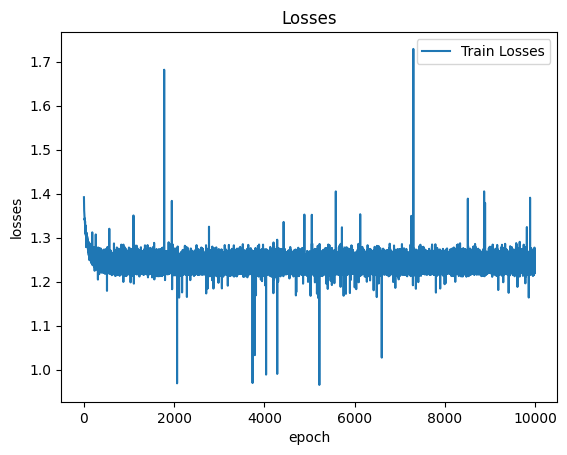

In [68]:
# Plotting the loss graph the graph of the best model
print("Best Model:")
print(f"Regularization: {best_reg_name}")
print(f"Method: {best_method}")
print(f"Final train loss: {best_train_loss}")
print(f"Final best accuracy: {best_accuracy}")
best_model.plot()
plt.show()

In [69]:
import cloudpickle

with open("./model/st125041_a3_model_scaled.pkl", "wb") as f:
    cloudpickle.dump(best_model, f)

In [70]:
with open("./model/st125041_a3_model.pkl", "wb") as f:
    cloudpickle.dump(best_model, f)

In [71]:
# Load the trained prediction model
with open("./model/st125041_a3_model.pkl", "rb") as f:
    loaded_model = cloudpickle.load(f)

In [72]:
car1 = pd.DataFrame([[2014, 21.14, 103.52]], columns=['year', 'mileage', 'max_power'])
car2 = pd.DataFrame([[2019, 16, 160.77]], columns=['year', 'mileage', 'max_power'])
car3 = pd.DataFrame([[2014, 23.4, 74]], columns=['year', 'mileage', 'max_power'])

In [73]:
import joblib
scalermodel = joblib.load("../code/model/scaler.dump")

fit_car1 = scalermodel.transform(car1)
fit_car2 = scalermodel.transform(car2)
fit_car3 = scalermodel.transform(car3)

carprice1 = loaded_model.predict(fit_car1)
carprice2 = loaded_model.predict(fit_car2)
carprice3 = loaded_model.predict(fit_car3)

print("Predicted price of Car 1:", carprice1[0])
print("Predicted price of Car 2:", carprice2[0])
print("Predicted price of Car 3:", carprice3[0])

Predicted price of Car 1: 1
Predicted price of Car 2: 3
Predicted price of Car 3: 0
